# Concert enjoyment classifier
Determine how much enjoyment a concert goer will have at a particular concert.

## Context
In this assignment, we will build several classifiers with general information, information from band, concert, concertgoer. 4 classes are included: 

1. Worst Concert Ever
2. Did Not Enjoy
3. Enjoyed
4. Best Concert Ever



## 0. Loading data and packages

In [ ]:
!rm -rf public
!git clone https://github.com/zhanwen-xin/concert-enjoyment-classification-data.git public

Cloning into 'public'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 37 (delta 7), reused 23 (delta 2), pack-reused 0
Unpacking objects: 100% (37/37), done.


In [ ]:
# Import Packages  
import pandas as pd
import numpy as np
import sklearn

# Load data
train_data = pd.read_csv("./public/data/train.csv")
test_data = pd.read_csv("./public/data/test.csv")

### 0.1 Visualize dataset

#### Original training set

In [ ]:
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,0.330843,-0.958408,-0.943548,-1.636806,29.0,concert_goer_1985,140.0,Paraguay,Did Not Enjoy
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,concert_goer_1874,158.0,United Kingdom (UK),Enjoyed
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,NaN,162754.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,concert_goer_442,159.0,United States of America (USA),Did Not Enjoy
3,ConcertExperience_140839,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,concert_goer_1149,150.0,Canada,Worst Concert Ever
4,ConcertExperience_19149,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,concert_goer_930,166.0,United Kingdom (UK),Did Not Enjoy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,ConcertExperience_14055,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,True,False,False,-0.095021,0.175175,0.914245,0.357359,50.0,concert_goer_707,180.0,United States of America (USA),Did Not Enjoy
169996,ConcertExperience_192792,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,False,False,False,-0.733719,-0.285776,-0.323312,0.641180,71.0,concert_goer_1373,143.0,Bulgaria,Worst Concert Ever
169997,ConcertExperience_152942,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,False,False,False,0.744969,-0.965547,1.020598,1.027389,27.0,concert_goer_1286,176.0,Canada,Did Not Enjoy
169998,ConcertExperience_138957,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,False,True,True,0.821976,0.351411,0.175762,1.455654,39.0,concert_goer_1845,176.0,Canada,Did Not Enjoy


#### Original test set: only 30% of the test set accessible

In [ ]:
test_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,ConcertExperience_70055,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,350.0,2980.0,True,False,True,1.065107,0.057660,0.249639,-0.933976,74.0,concert_goer_1587,165.0,United States of America (USA)
1,ConcertExperience_34799,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,173.0,8103.0,True,True,False,-0.886947,0.801365,0.525624,0.176655,29.0,concert_goer_293,151.0,Kenya
2,ConcertExperience_100410,Puddle of Joystick,Rock n Roll,Canada,2010.0,502.0,2980.0,True,True,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,concert_goer_1068,146.0,Canada
3,ConcertExperience_106446,Flight of the Knickers,NaN,Canada,2014.0,532.0,22026.0,True,False,False,-0.134180,-0.361512,0.969404,-2.341205,38.0,concert_goer_1315,183.0,United States of America (USA)
4,ConcertExperience_127249,Devon Revival,RnB,United States of America (USA),1992.0,636.0,2980.0,False,False,False,1.407366,-0.084155,-0.673233,1.733714,21.0,concert_goer_1777,177.0,Fiji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ConcertExperience_82288,Joystick of the Big Knickers,Hip Hop/Rap,United States of America (USA),1979.0,411.0,2980.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,concert_goer_1710,178.0,United States of America (USA)
29996,ConcertExperience_27139,Big Division,Hip Hop/Rap,United States of America (USA),1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,concert_goer_1758,186.0,Canada
29997,ConcertExperience_197434,Crazyplay,Pop Music,United States of America (USA),1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,concert_goer_1481,158.0,Greece
29998,ConcertExperience_166029,Lord of the Crazy Frogs,RnB,United States of America (USA),1968.0,830.0,8103.0,False,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,concert_goer_1461,170.0,United Kingdom (UK)


## 1. Data pre-processing function

### 1.1 Filter NaN with mean

In [ ]:
def nan_replace_with_mean(data):
  '''
  This function is to transform the boolean value True to float 1, False to float 0.0 and NaN to 0.5
  args: 
    Input:
        data(pandas.core.frame.DataFrame): one column of data to fit the encoder [shape: (# dataset,1)]

    Return:
        transformed_data(pandas.core.frame.DataFrame): data after transformation by the fit encoder [shape: (# dataset,1)]
  '''
  mean=data.mean(axis=0)
  transformed_data=data.fillna(mean)
  return transformed_data

### 1.2 One Hot encoder

In [ ]:
def onehot_encoder_fit_transform(train_data,test_data,column_head='none'):
  '''
  args: 
    Input:
        train_data(pandas.core.frame.DataFrame): one column of data to fit the encoder [shape: (#fitset,1)]
        test_data(pandas.core.frame.DataFrame): one column of data to transform by the encoder [shape: (#dataset to transform,1)]
        column_head(string): name of column that user wishes to define

    Return:
        transformed_data(pandas.core.frame.DataFrame): data after transformation by the fit encoder [shape: (#dataset transformed,#categories in fitset)]
  '''
  from sklearn import preprocessing
  encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
  encoder.fit(train_data)
  transformed_data=pd.DataFrame(encoder.transform(test_data).toarray())

  col_num=len(transformed_data.columns)
  column_name=[]
  for i in range(col_num):
    column_name.append('%s%d' % (column_head, i))

  transformed_data.columns = column_name
  return transformed_data

### 1.3 Label binarizer encoder

In [ ]:
def label_binarizer_transform(data):
  '''
  This function is to transform the boolean value True to float 1, False to float 0.0 and NaN to 0.5
  args: 
    Input:
        data(pandas.core.frame.DataFrame): one column of data to fit the encoder [shape: (# dataset to transform,1)]

    Return:
        transformed_data(pandas.core.frame.DataFrame): data after transformation by the fit encoder [shape: (# dataset to transform,1)]
  '''
  transformed_data=data*1
  transformed_data=transformed_data.fillna(0.5)
  return transformed_data

### 1.4 MinMax scalar

In [ ]:
def minmax_scalar(data):
  from sklearn.preprocessing import MinMaxScaler
  scaler_mm = MinMaxScaler()
  # nomalize data with minimum and maximum value
  data = scaler_mm.fit_transform(data)
  return data

### 1.5 Standardization scalar

In [ ]:
def standardize_scalar(data):
  from sklearn.preprocessing import StandardScaler
  scaler_ss = StandardScaler()
  # standardize data
  data = scaler_ss.fit_transform(data)
  return data

### 1.6 Shuffle

In [ ]:
def shuffle(y, X, seed=0):
    obs = X.shape[0]
    rng = np.random.default_rng(seed)
    perm = rng.permutation(obs)
    y = y[perm]
    X = X[perm, :]
    return (y, X)

### 1.7 Imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge

def imputeDataEstimator(data, estimator=BayesianRidge()):
  """Performs multivariate data imputation on NaN values using the given estimator

  Args:
    data (pandas.DataFrame): DataFrame of the entire dataset with NaNs
    estimator (estimator model): Model used to estimate NaN values

  Returns:
    data (pandas.DataFrame): DataFrame of the entire dataset without NaNs
  """
  imp = IterativeImputer(estimator=estimator, max_iter=10, random_state=0)
  data = imp.fit_transform(data.to_numpy())
  data = pd.DataFrame(data)
  return data

## 2. Data pre-process

### 2.1 Preprocess training and test attributes (Data V1)

#### 2.1.1 Process each column

In [ ]:
# Band Name column
train_column=train_data[['Band Name']]
BNtrain_transformed=onehot_encoder_fit_transform(train_column,train_column,column_head='BN').to_numpy()
test_column=test_data[['Band Name']]
BNtest_transformed=onehot_encoder_fit_transform(train_column,test_column,column_head='BN').to_numpy()

In [ ]:
# Band Genre column
train_column=train_data[['Band Genre']]
BGtrain_transformed=onehot_encoder_fit_transform(train_column,train_column,column_head='BG').to_numpy()
test_column=test_data[['Band Genre']]
BGtest_transformed=onehot_encoder_fit_transform(train_column,test_column,column_head='BG').to_numpy()

In [ ]:
# Band Country of Origin column
train_column=train_data[['Band Country of Origin']]
BCtrain_transformed=onehot_encoder_fit_transform(train_column,train_column,column_head='BC').to_numpy()
test_column=test_data[['Band Country of Origin']]
BCtest_transformed=onehot_encoder_fit_transform(train_column,test_column,column_head='BC').to_numpy()
#print(BCcolumn_transformed)

In [ ]:
# Band Debut column
train_column=train_data[['Band Debut']]
BDtrain_transformed=nan_replace_with_mean(train_column).to_numpy()
test_column=test_data[['Band Debut']]
BDtest_transformed=nan_replace_with_mean(test_column).to_numpy()

In [ ]:
# Concert ID column
train_column=train_data[['Concert ID']]
CItrain_transformed=nan_replace_with_mean(train_column).to_numpy()
test_column=test_data[['Concert ID']]
CItest_transformed=nan_replace_with_mean(test_column).to_numpy()

In [ ]:
# Concert Attendance column
train_column=train_data[['Concert Attendance']]
CAtrain_transformed=nan_replace_with_mean(train_column).to_numpy()
test_column=test_data[['Concert Attendance']]
CAtest_transformed=nan_replace_with_mean(test_column).to_numpy()

In [ ]:
# Personnality Trait 1 column
train_column=train_data[['Personnality Trait 1']]
PT1train_transformed=nan_replace_with_mean(train_column).to_numpy()
test_column=test_data[['Personnality Trait 1']]
PT1test_transformed=nan_replace_with_mean(test_column).to_numpy()

In [ ]:
# Personnality Trait 2 column
train_column=train_data[['Personnality Trait 2']]
PT2train_transformed=nan_replace_with_mean(train_column).to_numpy()
test_column=test_data[['Personnality Trait 2']]
PT2test_transformed=nan_replace_with_mean(test_column).to_numpy()

In [ ]:
# Personnality Trait 3 column
train_column=train_data[['Personnality Trait 3']]
PT3train_transformed=nan_replace_with_mean(train_column).to_numpy()
test_column=test_data[['Personnality Trait 3']]
PT3test_transformed=nan_replace_with_mean(test_column).to_numpy()

In [ ]:
# Personnality Trait 4 column
train_column=train_data[['Personnality Trait 4']]
PT4train_transformed=nan_replace_with_mean(train_column).to_numpy()
test_column=test_data[['Personnality Trait 4']]
PT4test_transformed=nan_replace_with_mean(test_column).to_numpy()

In [ ]:
# Concert Goer Age column
train_column=train_data[['Concert Goer Age']]
CGAtrain_transformed=nan_replace_with_mean(train_column).to_numpy()
test_column=test_data[['Concert Goer Age']]
CGAtest_transformed=nan_replace_with_mean(test_column).to_numpy()

In [ ]:
# Height (cm) column
train_column=train_data[['Height (cm)']]
HTtrain_transformed=nan_replace_with_mean(train_column).to_numpy()
test_column=test_data[['Height (cm)']]
HTtest_transformed=nan_replace_with_mean(test_column).to_numpy()

In [ ]:
# Inside Venue column
train_column=train_data[['Inside Venue']]
IVtrain_transformed=label_binarizer_transform(train_column).to_numpy()
test_column=test_data[['Inside Venue']]
IVtest_transformed=label_binarizer_transform(test_column).to_numpy()
#print(IVcolumn_transformed)

In [ ]:
# Rain column
train_column=train_data[['Rain']]
RNtrain_transformed=label_binarizer_transform(train_column).to_numpy()
test_column=test_data[['Rain']]
RNtest_transformed=label_binarizer_transform(test_column).to_numpy()
#print(RNcolumn_transformed)

In [ ]:
# Seated column
train_column=train_data[['Seated']]
STtrain_transformed=label_binarizer_transform(train_column).to_numpy()
test_column=test_data[['Seated']]
STtest_transformed=label_binarizer_transform(test_column).to_numpy()
#print(STcolumn_transformed)

In [ ]:
# Concert Goer ID column
train_column=train_data[['Concert Goer ID']]
CGtrain_transformed=onehot_encoder_fit_transform(train_column,train_column,column_head='CG').to_numpy()
test_column=test_data[['Concert Goer ID']]
CGtest_transformed=onehot_encoder_fit_transform(train_column,test_column,column_head='CG').to_numpy()
#print(CGcolumn_transformed)

In [ ]:
# Concert Goer Country of Origin column
train_column=train_data[['Concert Goer Country of Origin']]
CGCtrain_transformed=onehot_encoder_fit_transform(train_column,train_column,column_head='CGC').to_numpy()
test_column=test_data[['Concert Goer Country of Origin']]
CGCtest_transformed=onehot_encoder_fit_transform(train_column,test_column,column_head='CGC').to_numpy()
#print(CGCtrain_transformed.shape)

#### 2.1.2 Assemble processed columns

In [ ]:
# Assemble all
# Columns not used: ID, Concert goer ID
train_set=np.hstack((BNtrain_transformed, BGtrain_transformed, BCtrain_transformed, BDtrain_transformed,\
           CAtrain_transformed,IVtrain_transformed,RNtrain_transformed,STtrain_transformed,PT1train_transformed,\
           PT2train_transformed,PT3train_transformed,PT4train_transformed,CGAtrain_transformed,\
           HTtrain_transformed,CGCtrain_transformed,CItrain_transformed))

test_set=np.hstack((BNtest_transformed, BGtest_transformed, BCtest_transformed, BDtest_transformed,\
           CAtest_transformed,IVtest_transformed,RNtest_transformed,STtest_transformed,PT1test_transformed,\
           PT2test_transformed,PT3test_transformed,PT4test_transformed,CGAtest_transformed,\
           HTtest_transformed,CGCtest_transformed,CItest_transformed))

### 2.2 Preprocess training labels

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["Worst Concert Ever", "Did Not Enjoy", "Enjoyed", "Best Concert Ever"])
train_label=le.transform(train_data[['Concert Enjoyment']].to_numpy().ravel())

### 2.3 Understand dataset

|     Column number      |     attribute      | Type | Dist |  Num |
|------------------------|:------------------:|:----:|:----:|:----:|
|           0-54         |   Band name        | Cate.|      |  55  |
|           55-63        |   Band genre.      | Cate.|      |  9   |
|           64-68        |   Band country     | Cate.|      |  5   |
|            69          |   Band debute      | Num. |MinMax|  1   |
|            70          | Concert attendance | Num. |      |  1   |
|            71          |   Inside venue     | Bool |      |  1   |
|            72          |   Rain             | Bool |      |  1   |
|            73          |   Seated           | Bool |      |  1   |
|            74          | Personality Trait 1| Num. |      |  1   |
|            75          | Personality Trait 2| Num. |      |  1   |
|            76          | Personality Trait 3| Num. |      |  1   |
|            77          | Personality Trait 4| Num. |      |  1   |
|            78          |  Concert goer age  | Num. | Stand|  1   |
|            79          |   Height (cm)      | Num. | Stand|  1   |
|          80-232        |Concert goer country| Bool |      |  153 |
|            233         |Concert ID          | Num  |      |  1   |

#### 2.3.1 Visualize distribution of attributes and relation between

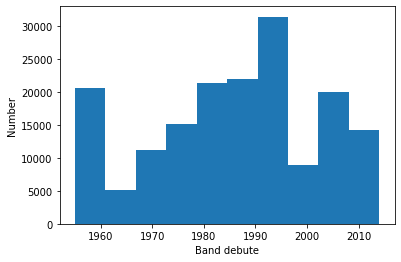

In [ ]:
import matplotlib.pyplot as plt
plt.hist(train_set[:,69])
plt.ylabel('Number')
plt.xlabel('Band debute');

[2.98000e+03 5.40000e+01 1.62754e+05 ... 5.40000e+01 2.20260e+04
 2.98000e+03]
1627540000.0
54.0


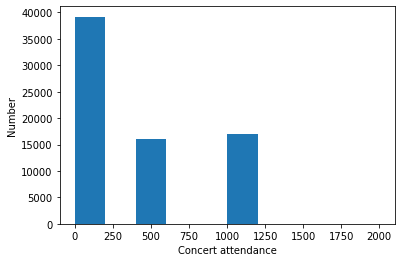

In [ ]:
plt.hist(train_set[:,70],range=(0,2000))
plt.ylabel('Number')
plt.xlabel('Concert attendance');
print(train_set[:,70])
print(train_set[:,70].max())
print(train_set[:,70].min())

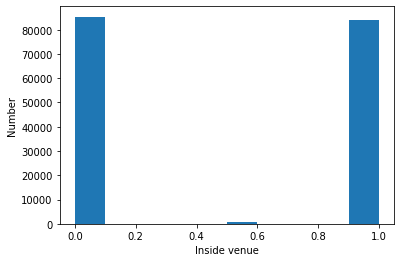

In [ ]:
plt.hist(train_set[:,71])
plt.ylabel('Number')
plt.xlabel('Inside venue');

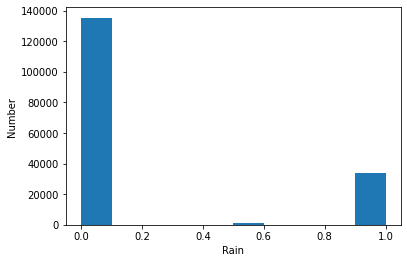

In [ ]:
plt.hist(train_set[:,72])
plt.ylabel('Number')
plt.xlabel('Rain');

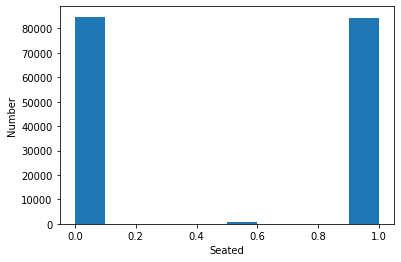

In [ ]:
plt.hist(train_set[:,73])
plt.ylabel('Number')
plt.xlabel('Seated');

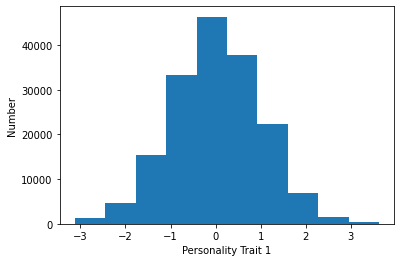

In [ ]:
plt.hist(train_set[:,74])
plt.ylabel('Number')
plt.xlabel('Personality Trait 1');

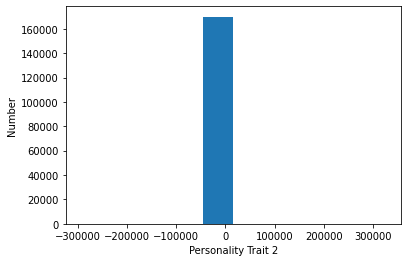

In [ ]:
plt.hist(train_set[:,75])
plt.ylabel('Number')
plt.xlabel('Personality Trait 2');

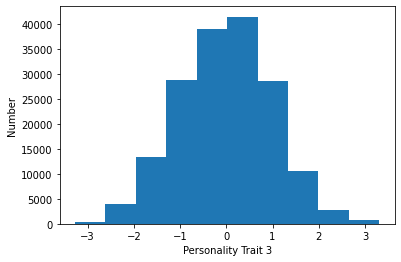

In [ ]:
plt.hist(train_set[:,76])
plt.ylabel('Number')
plt.xlabel('Personality Trait 3');

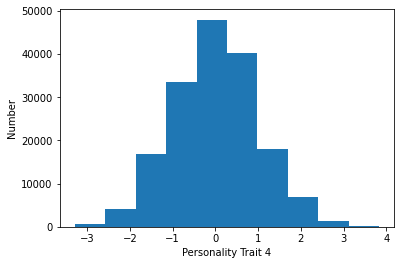

In [ ]:
plt.hist(train_set[:,77])
plt.ylabel('Number')
plt.xlabel('Personality Trait 4');

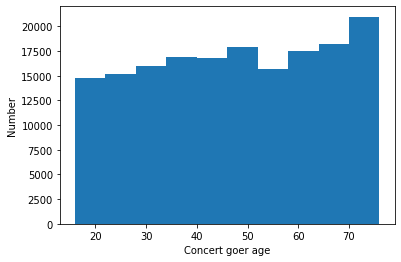

In [ ]:
plt.hist(train_set[:,78])
plt.ylabel('Number')
plt.xlabel('Concert goer age');

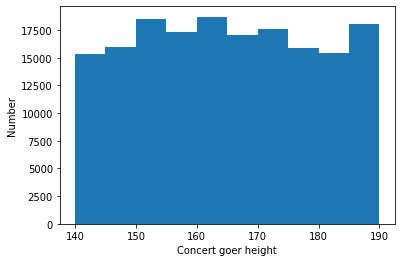

In [ ]:
plt.hist(train_set[:,79])
plt.ylabel('Number')
plt.xlabel('Concert goer height');

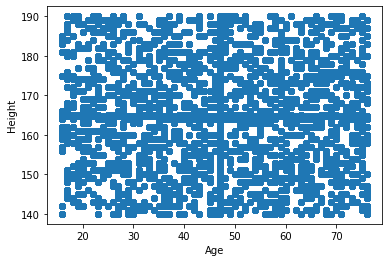

In [ ]:
plt.scatter(train_set[:,78], train_set[:,79])
plt.ylabel('Height')
plt.xlabel('Age');

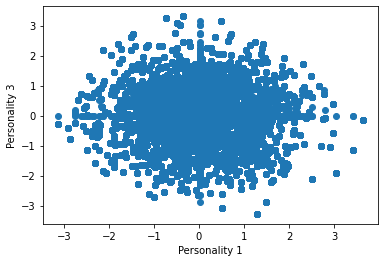

In [ ]:
plt.scatter(train_set[:,74], train_set[:,76])
plt.ylabel('Personality 3')
plt.xlabel('Personality 1');

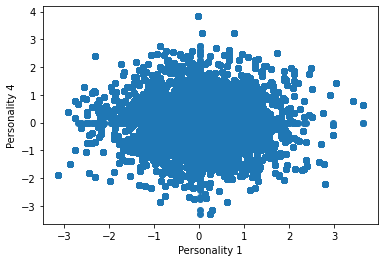

In [ ]:
plt.scatter(train_set[:,74], train_set[:,77])
plt.ylabel('Personality 4')
plt.xlabel('Personality 1');

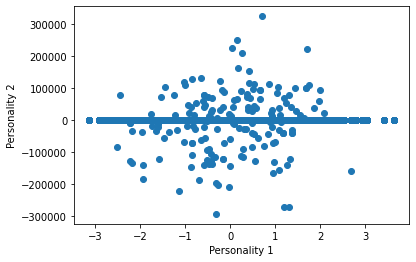

In [ ]:
plt.scatter(train_set[:,74], train_set[:,75])
plt.ylabel('Personality 2')
plt.xlabel('Personality 1');

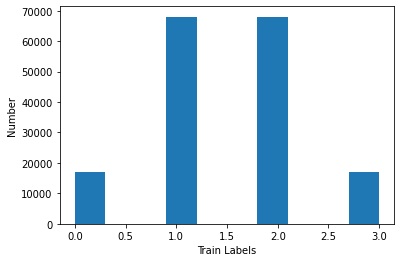

In [ ]:
plt.hist(train_label)
plt.ylabel('Number')
plt.xlabel('Train Labels');

#### 2.3.2 Heatmap before and after resample

##### 2.3.2.1 Transform data to dataframe




In [ ]:
# keeps only the non string inputs to visualize the heatmap
heatmap_data = np.hstack((BDtrain_transformed,CItrain_transformed,\
              CAtrain_transformed,IVtrain_transformed,RNtrain_transformed,STtrain_transformed,PT1train_transformed,\
              PT2train_transformed,PT3train_transformed,PT4train_transformed,CGAtrain_transformed,\
              HTtrain_transformed))
# get columns name of data
heatmap_col = list(train_data.columns)
heatmap_col = heatmap_col[4:-2]
heatmap_col.remove('Concert Goer ID')
heatmap_df = pd.DataFrame(heatmap_data, columns = heatmap_col)

###### <font color='grey'>[O] Visualize the dataframe </font> 

In [ ]:
heatmap_df

,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Height (cm)
0,1976.0,900.000000,2980.0,0.0,0.0,0.5,0.330843,-0.958408,-0.943548,-1.636806,29.0,140.0
1,1968.0,731.000000,54.0,1.0,0.0,1.0,-2.069449,0.017777,-1.910675,0.610265,43.0,158.0
2,1955.0,499.360587,162754.0,0.0,0.0,1.0,-0.484268,1.968772,-0.064167,-1.260871,68.0,159.0
3,1992.0,704.000000,8103.0,0.0,1.0,0.0,-0.858054,1.022827,-0.348389,-1.147251,17.0,150.0
4,1968.0,95.000000,54.0,0.0,0.0,0.0,-0.793029,-1.166528,-0.043766,0.969661,59.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...
169995,1985.0,70.000000,162754.0,1.0,0.0,0.0,-0.095021,0.175175,0.914245,0.357359,50.0,180.0
169996,1985.0,963.000000,54.0,0.0,0.0,0.0,-0.733719,-0.285776,-0.323312,0.641180,71.0,143.0
169997,2005.0,764.000000,54.0,0.0,0.0,0.0,0.744969,-0.965547,1.020598,1.027389,27.0,176.0
169998,1995.0,694.000000,22026.0,0.0,1.0,1.0,0.821976,0.351411,0.175762,1.455654,39.0,176.0


##### 2.3.2.2 Print Heatmap

In [ ]:
import seaborn as sb
def print_heatmap(data: pd.DataFrame):
  """ Print heatmap.

    Args:
        data (DataFrame): the dataframe to transform in heatmap
    """
  #show heatmap of dataframe (before resample)
  df = data.astype(float)
  plt.figure(figsize=[14,5],facecolor='white')
  sb.heatmap(df.corr(),annot=True, vmin=-1, vmax=1)
  plt.show()

###### <font color='grey'>[O] Visualize the heatmap </font> 


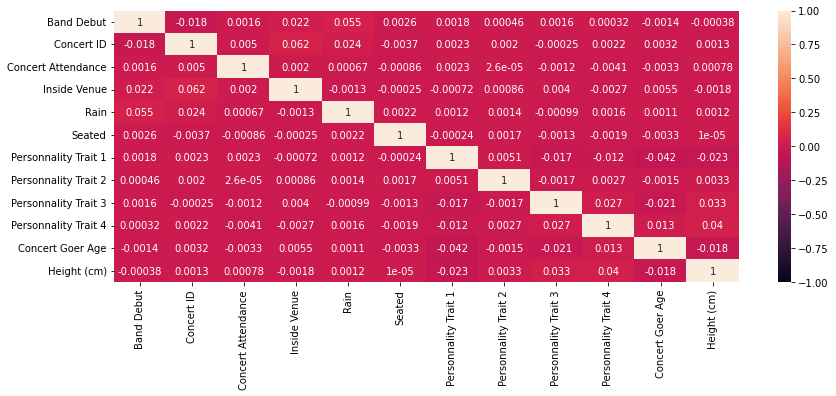

In [ ]:
print_heatmap(heatmap_df)

##### 2.3.2.3 Convert class from string to int

In [ ]:
# convert class value from string to int
df_class = train_data['Concert Enjoyment']
df_class = df_class.replace({"Best Concert Ever": 0})
df_class = df_class.replace({"Enjoyed": 1})
df_class = df_class.replace({"Did Not Enjoy": 2})
df_class = df_class.replace({"Worst Concert Ever": 3})

##### 2.3.2.4 Sample imbalanced data

In [ ]:
from imblearn.over_sampling import SMOTE
def sampled_data(data_x: pd.DataFrame, data_y: pd.DataFrame) -> pd.DataFrame: 
  """ Balance the imbalance data.

    Args:
        data_x (DataFrame): unsampled dataframe (features)
        data_y (DataFrame): unsampled dataframe (class)
    Returns:
        sampled_x (DataFrame): sampled dataframe (features)
        sampled_y (DataFrame): sampled dataframe (class)
  """
  # resample the minority class
  sm = SMOTE(sampling_strategy ='minority', random_state = 7)
  # fit the model
  sampled_x, sampled_y = sm.fit_resample(data_x, data_y)

  return sampled_x, sampled_y
  

###### <font color='grey'>[O] Visualize the sampled heatmap </font> 

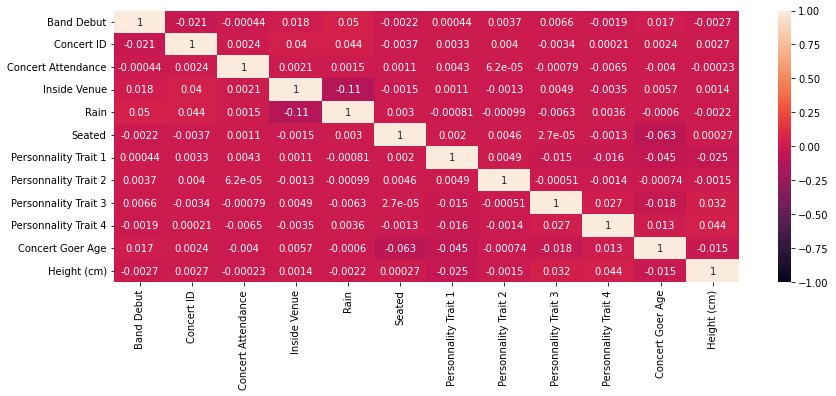

In [ ]:
sampled_heatmap, sampled_class = sampled_data(heatmap_df, df_class)
print_heatmap(sampled_heatmap)

### 2.4 Standardize and nomalize data

In [ ]:
# Assemble all
# Columns not used: ID, Concert goer ID

BDtrain_transformed_mm=minmax_scalar(BDtrain_transformed)
BDtest_transformed_mm=minmax_scalar(BDtest_transformed)

CGAtrain_transformed_ss=standardize_scalar(CGAtrain_transformed)
CGAtest_transformed_ss=standardize_scalar(CGAtest_transformed)

HTtrain_transformed_ss=standardize_scalar(HTtrain_transformed)
HTtest_transformed_ss=standardize_scalar(HTtest_transformed)

train_set=np.hstack((BNtrain_transformed, BGtrain_transformed, BCtrain_transformed, BDtrain_transformed_mm,\
           CAtrain_transformed,IVtrain_transformed,RNtrain_transformed,STtrain_transformed,PT1train_transformed,\
           PT2train_transformed,PT3train_transformed,PT4train_transformed,CGAtrain_transformed_ss,\
           HTtrain_transformed_ss,CGCtrain_transformed,CItrain_transformed))

test_set=np.hstack((BNtest_transformed, BGtest_transformed, BCtest_transformed, BDtest_transformed_mm,\
           CAtest_transformed,IVtest_transformed,RNtest_transformed,STtest_transformed,PT1test_transformed,\
           PT2test_transformed,PT3test_transformed,PT4test_transformed,CGAtest_transformed_ss,\
           HTtest_transformed_ss,CGCtest_transformed,CItest_transformed))

### 2.5 Convert country to coordinate: (Data V2)

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
from geopy.extra.rate_limiter import RateLimiter

def dictionaryOfCountries(data, column):
  """Converts country names to corresponding coordinates

  Args:
    data (pandas.DataFrame): DataFrame of the entire dataset
    column (string): Name of column to convert into coordinates

  Returns:
    map (dictionary): Dictionary with (country as string: coordinates as tuple) as key: value

  """
  geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
  map = {}

  unique_countries = data[column].unique()
  for country in unique_countries:
    if isinstance(country, str) and country is not None and country != "Insert Band Country of Origin":
      last_index = country.rfind('(')
      if last_index != -1:
        country = country[0:last_index-1]
      coordinates = geocode(country)
      map[country] = (coordinates.latitude, coordinates.longitude)
    else:
      map[country] = (None, None)

  return map

In [ ]:
def country_to_coordinate(country_data: pd.DataFrame, coordinate_dict: dict) -> pd.DataFrame: 
  """ Replace the country name with its coordinate (latitude and longitude).

    Args:
        country_data (pd.DataFrame): country dataframe
        coordinate_dict (dict): dictionary of country's coordinate 
    Returns:
        coordinate_data (pd.DataFrame): coordinate dataframe
  """
  # remove content in the ()
  num_dataset=len(country_data)
  for i in range(num_dataset):
    country_i=str(country_data.iat[i,0])
    last_index = country_i.rfind('(')
    if last_index != -1:
        country_data.iat[i,0] = country_i[0:last_index-1]  
  # convert the country column to coordinate column
  column_name = country_data.columns
  country_data = country_data.rename(columns={column_name[0] : 'Latitude'})
  country_data['Longitude'] = country_data['Latitude']
  # replace country by coordinate
  for country in coordinate_dict.keys():
    country_data['Latitude'] = country_data['Latitude'].replace({country: coordinate_dict[country][0]})
    country_data['Longitude'] = country_data['Longitude'].replace({country: coordinate_dict[country][1]})
  return country_data

In [ ]:
dic_Bcountry_coordinates_train=dictionaryOfCountries(train_data,'Band Country of Origin')
band_country_coordinate_train=country_to_coordinate(train_data[['Band Country of Origin']],dic_Bcountry_coordinates_train)

dic_Bcountry_coordinates_test=dictionaryOfCountries(test_data,'Band Country of Origin')
band_country_coordinate_test=country_to_coordinate(test_data[['Band Country of Origin']],dic_Bcountry_coordinates_test)

dic_Ccountry_coordinates_train=dictionaryOfCountries(train_data,'Concert Goer Country of Origin')
cg_country_coordinate_train=country_to_coordinate(train_data[['Concert Goer Country of Origin']],dic_Ccountry_coordinates_train)

dic_Ccountry_coordinates_test=dictionaryOfCountries(test_data,'Concert Goer Country of Origin')
cg_country_coordinate_test=country_to_coordinate(test_data[['Concert Goer Country of Origin']],dic_Ccountry_coordinates_test)

In [ ]:
# Replace Nan with mean and convert to numpy array
bc_coordinate_train_transformed=nan_replace_with_mean(band_country_coordinate_train).to_numpy()
bc_coordinate_test_transformed=nan_replace_with_mean(band_country_coordinate_test).to_numpy()
cg_coordinate_train_transformed=nan_replace_with_mean(cg_country_coordinate_train).to_numpy()
cg_coordinate_test_transformed=nan_replace_with_mean(cg_country_coordinate_test).to_numpy()

In [ ]:
# Assemble all
# Columns not used: ID, Concert goer ID
train_set=np.hstack((BNtrain_transformed, BGtrain_transformed, bc_coordinate_train_transformed, BDtrain_transformed,\
           CAtrain_transformed,IVtrain_transformed,RNtrain_transformed,STtrain_transformed,PT1train_transformed,\
           PT2train_transformed,PT3train_transformed,PT4train_transformed,CGAtrain_transformed,\
           HTtrain_transformed,cg_coordinate_train_transformed,CItrain_transformed))

test_set=np.hstack((BNtest_transformed, BGtest_transformed, bc_coordinate_test_transformed, BDtest_transformed,\
           CAtest_transformed,IVtest_transformed,RNtest_transformed,STtest_transformed,PT1test_transformed,\
           PT2test_transformed,PT3test_transformed,PT4test_transformed,CGAtest_transformed,\
           HTtest_transformed,cg_coordinate_test_transformed,CItest_transformed))

### 2.6 Band name (Data V3)

In [ ]:
# Band Name column
from sklearn import preprocessing
le_2 = preprocessing.LabelEncoder()
le_2.fit(train_data[['Band Name']])

band_name_label_train=le_2.transform(train_data[['Band Name']])
band_name_label_test=le_2.transform(test_data[['Band Name']])

band_name_label_train=band_name_label_train.reshape((len(band_name_label_train), 1))
band_name_label_test=band_name_label_test.reshape((len(band_name_label_test), 1))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
'''
# Band genre column
from sklearn import preprocessing
le_3 = preprocessing.LabelEncoder()
le_3.fit(train_data[['Band Genre']])

band_genre_label_train=le_3.transform(train_data[['Band Genre']])
band_genre_label_test=le_3.transform(test_data[['Band Genre']])

band_genre_label_train=band_genre_label_train.reshape((len(band_name_label_train), 1))
band_genre_label_test=band_genre_label_test.reshape((len(band_name_label_test), 1))
'''

"\n# Band genre column\nfrom sklearn import preprocessing\nle_3 = preprocessing.LabelEncoder()\nle_3.fit(train_data[['Band Genre']])\n\nband_genre_label_train=le_3.transform(train_data[['Band Genre']])\nband_genre_label_test=le_3.transform(test_data[['Band Genre']])\n\nband_genre_label_train=band_genre_label_train.reshape((len(band_name_label_train), 1))\nband_genre_label_test=band_genre_label_test.reshape((len(band_name_label_test), 1))\n"

##### Assemble

In [ ]:
# Assemble all
# Columns not used: ID, Concert goer ID
train_set=np.hstack((band_name_label_train, BGtrain_transformed,\
                     bc_coordinate_train_transformed, BDtrain_transformed,\
                     CAtrain_transformed,IVtrain_transformed,RNtrain_transformed,STtrain_transformed,PT1train_transformed,\
                     PT2train_transformed,PT3train_transformed,PT4train_transformed,CGAtrain_transformed,\
                     HTtrain_transformed,cg_coordinate_train_transformed,CItrain_transformed))

test_set=np.hstack((band_name_label_test, BGtest_transformed,\
                    bc_coordinate_test_transformed, BDtest_transformed,\
                    CAtest_transformed,IVtest_transformed,RNtest_transformed,STtest_transformed,PT1test_transformed,\
                    PT2test_transformed,PT3test_transformed,PT4test_transformed,CGAtest_transformed,\
                    HTtest_transformed,cg_coordinate_test_transformed,CItest_transformed))

#### Extra 2.6.2 Heatmap before and after resample

##### 2.6.2.1 Transform data to dataframe




In [ ]:
# keeps only the non string inputs to visualize the heatmap
heatmap_data = np.hstack((band_name_label_train.reshape((len(band_name_label_train), 1)), BGtrain_transformed,\
                     bc_coordinate_train_transformed, BDtrain_transformed,\
                     CAtrain_transformed,IVtrain_transformed,RNtrain_transformed,STtrain_transformed,PT1train_transformed,\
                     PT2train_transformed,PT3train_transformed,PT4train_transformed,CGAtrain_transformed,\
                     HTtrain_transformed,cg_coordinate_train_transformed,CItrain_transformed))
#heatmap_data = heatmap_data[:,64:]
# get columns name of data
heatmap_df = pd.DataFrame(heatmap_data)

##### 2.6.2.2 Print Heatmap

In [ ]:
import seaborn as sb
def print_heatmap(data: pd.DataFrame):
  """ Print heatmap.

    Args:
        data (DataFrame): the dataframe to transform in heatmap
    """
  #show heatmap of dataframe (before resample)
  df = data.astype(float)
  plt.figure(figsize=[14,5],facecolor='white')
  sb.heatmap(df.corr(),annot=True, vmin=-1, vmax=1)
  plt.show()

###### <font color='grey'>[O] Visualize the heatmap </font> 


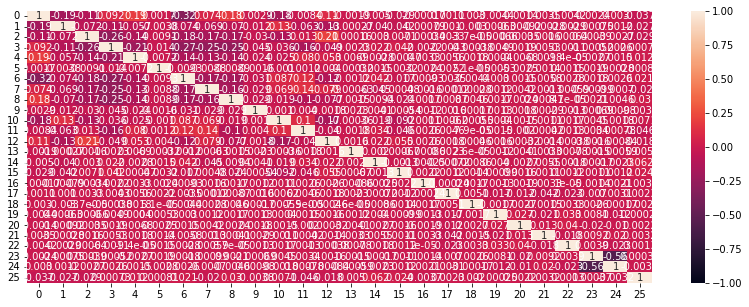

In [ ]:
print_heatmap(heatmap_df)

##### 2.6.2.3 Convert class from string to int

In [ ]:
# convert class value from string to int
df_class = train_data['Concert Enjoyment']
df_class = df_class.replace({"Best Concert Ever": 0})
df_class = df_class.replace({"Enjoyed": 1})
df_class = df_class.replace({"Did Not Enjoy": 2})
df_class = df_class.replace({"Worst Concert Ever": 3})

##### 2.6.2.4 Sample imbalanced data

In [ ]:
from imblearn.over_sampling import SMOTE
def sampled_data(data_x: pd.DataFrame, data_y: pd.DataFrame) -> pd.DataFrame: 
  """ Balance the imbalance data.

    Args:
        data_x (DataFrame): unsampled dataframe (features)
        data_y (DataFrame): unsampled dataframe (class)
    Returns:
        sampled_x (DataFrame): sampled dataframe (features)
        sampled_y (DataFrame): sampled dataframe (class)
  """
  # resample the minority class
  sm = SMOTE(sampling_strategy ='minority', random_state = 7)
  # fit the model
  sampled_x, sampled_y = sm.fit_resample(data_x, data_y)

  return sampled_x, sampled_y
  

###### 2.6.2.5 Visualize the sampled heatmap

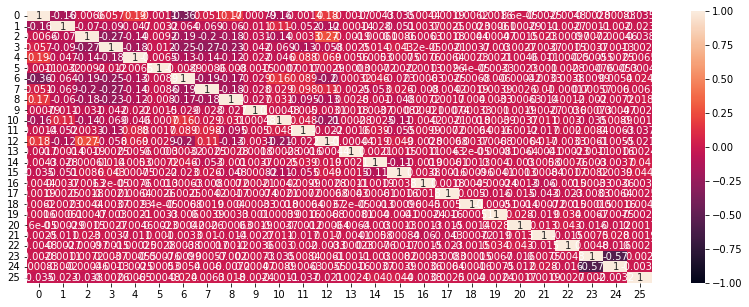

In [ ]:
sampled_heatmap, sampled_class = sampled_data(heatmap_df, df_class)
print_heatmap(sampled_heatmap)

The latitude has correlation with band debut\
Concert goer country latitude has correlation with concert goer country longitude

### 2.7 Concert Goer ID

In [ ]:
'''
CGI_transformed_train=train_data[['Concert Goer ID']]
CGI_transformed_train=CGI_transformed_train['Concert Goer ID'].str.replace("concert_goer_", "").astype(float)
CGI_transformed_train=nan_replace_with_mean(CGI_transformed_train).to_numpy()
CGI_transformed_train=CGI_transformed_train.reshape((len(CGI_transformed_train), 1))

CGI_transformed_test=test_data[['Concert Goer ID']]
CGI_transformed_test=CGI_transformed_test['Concert Goer ID'].str.replace("concert_goer_", "").astype(float)
CGI_transformed_test=nan_replace_with_mean(CGI_transformed_test).to_numpy()
CGI_transformed_test=CGI_transformed_test.reshape((len(CGI_transformed_test), 1))
'''

'\nCGI_transformed_train=train_data[[\'Concert Goer ID\']]\nCGI_transformed_train=CGI_transformed_train[\'Concert Goer ID\'].str.replace("concert_goer_", "").astype(float)\nCGI_transformed_train=nan_replace_with_mean(CGI_transformed_train).to_numpy()\nCGI_transformed_train=CGI_transformed_train.reshape((len(CGI_transformed_train), 1))\n\nCGI_transformed_test=test_data[[\'Concert Goer ID\']]\nCGI_transformed_test=CGI_transformed_test[\'Concert Goer ID\'].str.replace("concert_goer_", "").astype(float)\nCGI_transformed_test=nan_replace_with_mean(CGI_transformed_test).to_numpy()\nCGI_transformed_test=CGI_transformed_test.reshape((len(CGI_transformed_test), 1))\n'

In [ ]:
'''
# Assemble all
# Columns not used: ID
train_set=np.hstack((band_name_label_train, band_genre_label_train,\
                     bc_coordinate_train_transformed, BDtrain_transformed,\
                     CAtrain_transformed,IVtrain_transformed,RNtrain_transformed,STtrain_transformed,PT1train_transformed,\
                     PT2train_transformed,PT3train_transformed,PT4train_transformed,CGAtrain_transformed,CGI_transformed_train,\
                     HTtrain_transformed,cg_coordinate_train_transformed,CItrain_transformed))

test_set=np.hstack((band_name_label_test, band_genre_label_test,\
                    bc_coordinate_test_transformed, BDtest_transformed,\
                    CAtest_transformed,IVtest_transformed,RNtest_transformed,STtest_transformed,PT1test_transformed,\
                    PT2test_transformed,PT3test_transformed,PT4test_transformed,CGAtest_transformed,CGI_transformed_test,\
                    HTtest_transformed,cg_coordinate_test_transformed,CItest_transformed))
'''

'\n# Assemble all\n# Columns not used: ID\ntrain_set=np.hstack((band_name_label_train, band_genre_label_train,                     bc_coordinate_train_transformed, BDtrain_transformed,                     CAtrain_transformed,IVtrain_transformed,RNtrain_transformed,STtrain_transformed,PT1train_transformed,                     PT2train_transformed,PT3train_transformed,PT4train_transformed,CGAtrain_transformed,CGI_transformed_train,                     HTtrain_transformed,cg_coordinate_train_transformed,CItrain_transformed))\n\ntest_set=np.hstack((band_name_label_test, band_genre_label_test,                    bc_coordinate_test_transformed, BDtest_transformed,                    CAtest_transformed,IVtest_transformed,RNtest_transformed,STtest_transformed,PT1test_transformed,                    PT2test_transformed,PT3test_transformed,PT4test_transformed,CGAtest_transformed,CGI_transformed_test,                    HTtest_transformed,cg_coordinate_test_transformed,CItest_transformed))\n'

### 2.8 Normalized data for NN  (Data V4)

In [ ]:
band_name_label_train_ss=standardize_scalar(band_name_label_train)
band_genre_label_train_ss=standardize_scalar(BGtrain_transformed)
bc_coordinate_train_transformed_ss=standardize_scalar(bc_coordinate_train_transformed)
BDtrain_transformed_ss=standardize_scalar(BDtrain_transformed)
CAtrain_transformed_ss=standardize_scalar(CAtrain_transformed)
PT1train_transformed_ss=standardize_scalar(PT1train_transformed)
PT2train_transformed_ss=standardize_scalar(PT2train_transformed)
PT3train_transformed_ss=standardize_scalar(PT3train_transformed)
PT4train_transformed_ss=standardize_scalar(PT4train_transformed)
cg_coordinate_train_transformed_ss=standardize_scalar(cg_coordinate_train_transformed)
CItrain_transformed_ss=standardize_scalar(CItrain_transformed)

band_name_label_test_ss=standardize_scalar(band_name_label_test)
band_genre_label_test_ss=standardize_scalar(BGtest_transformed)
bc_coordinate_test_transformed_ss=standardize_scalar(bc_coordinate_test_transformed)
BDtest_transformed_ss=standardize_scalar(BDtest_transformed)
CAtest_transformed_ss=standardize_scalar(CAtest_transformed)
PT1test_transformed_ss=standardize_scalar(PT1test_transformed)
PT2test_transformed_ss=standardize_scalar(PT2test_transformed)
PT3test_transformed_ss=standardize_scalar(PT3test_transformed)
PT4test_transformed_ss=standardize_scalar(PT4test_transformed)
cg_coordinate_test_transformed_ss=standardize_scalar(cg_coordinate_test_transformed)
CItest_transformed_ss=standardize_scalar(CItest_transformed)

train_set_NN=np.hstack((band_name_label_train_ss, band_genre_label_train_ss,\
                     bc_coordinate_train_transformed_ss, BDtrain_transformed_ss,\
                     CAtrain_transformed_ss,IVtrain_transformed,RNtrain_transformed,STtrain_transformed,PT1train_transformed_ss,\
                     PT2train_transformed_ss,PT3train_transformed_ss,PT4train_transformed_ss,CGAtrain_transformed_ss,\
                     HTtrain_transformed_ss,cg_coordinate_train_transformed_ss,CItrain_transformed_ss))

test_set_NN=np.hstack((band_name_label_test_ss, band_genre_label_test_ss,\
                    bc_coordinate_test_transformed_ss, BDtest_transformed_ss,\
                    CAtest_transformed_ss,IVtest_transformed,RNtest_transformed,STtest_transformed,PT1test_transformed_ss,\
                    PT2test_transformed_ss,PT3test_transformed_ss,PT4test_transformed_ss,CGAtest_transformed_ss,\
                    HTtest_transformed_ss,cg_coordinate_test_transformed_ss,CItest_transformed_ss))

## 3. Fit classifier

### 3.0 Helper functions

#### 3.0.1 Split test set 20000

In [ ]:
private_test_set=train_set[-20000:,:]
private_train_set_to_shuffle=train_set[:150000,:]

private_test_label=train_label[-20000:]
private_train_label_to_shuffle=train_label[:150000]

In [ ]:
(private_train_label,private_train_set)=shuffle(private_train_label_to_shuffle,private_train_set_to_shuffle)

#### 3.0.2 Download

In [ ]:
# def download_predicted_label(predicted_label_number):
def download_predicted_label(predicted_label_number, origin_data, output_name):
  """ Generate an Excel file with prediction output.

    Args:
        predicted_label_number (List): predicted output
        origin_data (DataFrame): origin input data
        output_name (string): name of output file
  """
  y_pred_label=le.inverse_transform(predicted_label_number)
  y_pred_label = pd.DataFrame(y_pred_label, columns=['Predicted'])
  y_pred_label = pd.concat([origin_data['Id'], y_pred_label], axis=1)
  # To download
  from google.colab import files
  y_pred_label.to_csv(output_name,encoding='utf-8-sig', index=False) 
  files.download(output_name)

### 3.1 Decision tree

In [129]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Set the parameters by cross-validation
tuned_parameters = [
  {'max_depth': [15]},
]
stratified_3_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
grid_search = GridSearchCV(
    DecisionTreeClassifier(), tuned_parameters, scoring='accuracy', cv=stratified_3_fold
)
grid_search.fit(private_train_set, private_train_label);
print('Finished!')

Finished!


In [130]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)

Best parameters set found on development set:

{'max_depth': 15}


In [131]:
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:

0.599 (+/-0.012) for {'max_depth': 15}


In [132]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = private_test_label, grid_search.predict(private_test_set)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.47      0.26      0.34      1981
           1       0.61      0.70      0.65      7964
           2       0.62      0.65      0.63      8040
           3       0.59      0.39      0.47      2015

    accuracy                           0.60     20000
   macro avg       0.57      0.50      0.52     20000
weighted avg       0.60      0.60      0.59     20000




In [133]:
submit_label=grid_search.predict(test_set)
download_predicted_label(submit_label, test_data, 'decision_tree_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3.2 Random forest (optimal n estimator: 500)

In [134]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Set the parameters by cross-validation
tuned_parameters = [
  {'n_estimators': [50]},
]
stratified_3_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
grid_search = GridSearchCV(
    RandomForestClassifier(class_weight = "balanced"), tuned_parameters, scoring='accuracy', cv=stratified_3_fold
)
grid_search.fit(private_train_set, private_train_label);
print('Finished!')

Finished!


In [135]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)

Best parameters set found on development set:

{'n_estimators': 50}


In [136]:
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:

0.641 (+/-0.007) for {'n_estimators': 50}


In [137]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = private_test_label, grid_search.predict(private_test_set)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.60      0.31      0.41      1981
           1       0.66      0.73      0.69      7964
           2       0.65      0.73      0.69      8040
           3       0.67      0.39      0.49      2015

    accuracy                           0.65     20000
   macro avg       0.64      0.54      0.57     20000
weighted avg       0.65      0.65      0.64     20000




In [138]:
submit_label=grid_search.predict(test_set)
download_predicted_label(submit_label, test_data, 'random_forest_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3.3 XGBoost

Record of hyper-parameter tuning: \
**'min_child_weight': 5** out of [5,15,200] under n_estimator=100, max_depth=3(default), 0.65 accuracy,  32 mins of running time \
**'reg_lambda': 4** out of [1,4,8] under n_estimator=100, max_depth=3(default), and min_child_weight = 5, 0.65 accuracy, 32 mins of running time \
**'max_depth': 36 (big change)** out of [4,8,12,16,20,24,28,32,36] under n_estimator=100, reg_lambda=4, and min_child_weight = 5; 0.67 of accuracy, 1h28m35s of running time [**accuracy of 0.66323 on Kaggle**]\
**'n_estimator': 150 (big change)** out of [50,100,150] under n_estimator=100, reg_lambda=4, max_depth=12, and min_child_weight = 5; 0.67 of accuracy, 1h28m35s of running time 

In [139]:
# calculate class weight
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=train_label
)

In [140]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Set the parameters by cross-validation
# Optimal value (V2 data Coodinate): n_estimators=150;
# Optimal value (V3 data BN): n_estimators=50, reg_lambda=32, max_depth=15;
# Optimal value (V4 data BN+BG): n_estimators=100, reg_lambda=12, max_depth=15;
# Optimal value (V5 data CGI): n_estimators=50, reg_lambda=12, max_depth=19, child weight=15;
tuned_parameters = [
  {'n_estimators': [50],
   'max_depth':[15],
   'reg_lambda':[16],
   'min_child_weight':[5]
   },
]
stratified_3_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
grid_search = GridSearchCV(
    XGBClassifier(sample_weight=sample_weights), tuned_parameters, scoring='accuracy', cv=stratified_3_fold
)
grid_search.fit(train_set, train_label); # train on the whole training
print('Finished!')

Finished!


In [141]:
print("Best parametersm set found on development set:")
print()
print(grid_search.best_params_)

Best parametersm set found on development set:

{'max_depth': 15, 'min_child_weight': 5, 'n_estimators': 50, 'reg_lambda': 16}


In [142]:
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:

0.656 (+/-0.003) for {'max_depth': 15, 'min_child_weight': 5, 'n_estimators': 50, 'reg_lambda': 16}


In [143]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = private_test_label, grid_search.predict(private_test_set)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.90      0.52      0.66      1981
           1       0.77      0.84      0.80      7964
           2       0.77      0.85      0.80      8040
           3       0.88      0.59      0.71      2015

    accuracy                           0.79     20000
   macro avg       0.83      0.70      0.74     20000
weighted avg       0.79      0.79      0.78     20000




In [144]:
submit_label=grid_search.predict(test_set)
download_predicted_label(submit_label, test_data ,'xgboost_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3.4 Naive Bayes Classifier

In [145]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(private_train_set, private_train_label)
y_modelpred=clf.predict(private_test_set)
accuracy=accuracy_score(private_test_label, y_modelpred)
print("Accuracy on development set:")
print(accuracy)

Accuracy on development set:
0.3981


### 3.5 Logistic regression classifier

In [146]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Set the parameters by cross-validation
tuned_parameters = [
  {'C': [0.001],
   'max_iter': [15]},
]
stratified_3_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
grid_search = GridSearchCV(
    LogisticRegression(), tuned_parameters, scoring='accuracy', cv=stratified_3_fold
)
grid_search.fit(private_train_set, private_train_label);
print('Finished!')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Finished!


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
print("Best parametersm set found on development set:")
print()
print(grid_search.best_params_)

Best parametersm set found on development set:

{'C': 0.001, 'max_iter': 15}


In [148]:
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:

0.401 (+/-0.003) for {'C': 0.001, 'max_iter': 15}


In [149]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = private_test_label, grid_search.predict(private_test_set)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1981
           1       0.40      0.55      0.47      7964
           2       0.40      0.45      0.42      8040
           3       0.00      0.00      0.00      2015

    accuracy                           0.40     20000
   macro avg       0.20      0.25      0.22     20000
weighted avg       0.32      0.40      0.36     20000




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
submit_label=grid_search.predict(test_set)
download_predicted_label(submit_label, test_data, 'logistic_regression_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3.6 SVM classifier

In [151]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Set the parameters by cross-validation
tuned_parameters = [
  {'C': [0.1],
   'max_iter': [150]}
]
stratified_3_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
grid_search = GridSearchCV(
    LinearSVC(), tuned_parameters, scoring='accuracy', cv=stratified_3_fold
)
grid_search.fit(private_train_set, private_train_label);
print('Finished!')

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Finished!


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [152]:
print("Best parametersm set found on development set:")
print()
print(grid_search.best_params_)

Best parametersm set found on development set:

{'C': 0.1, 'max_iter': 150}


In [153]:
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:

0.345 (+/-0.155) for {'C': 0.1, 'max_iter': 150}


In [154]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = private_test_label, grid_search.predict(private_test_set)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.13      0.31      0.18      1981
           1       0.41      0.78      0.54      7964
           2       0.87      0.00      0.00      8040
           3       0.33      0.00      0.00      2015

    accuracy                           0.34     20000
   macro avg       0.43      0.27      0.18     20000
weighted avg       0.56      0.34      0.23     20000




In [155]:
submit_label=grid_search.predict(test_set)
download_predicted_label(submit_label, test_data, 'svm_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3.7 KNN classifier

In [156]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Set the parameters by cross-validation
tuned_parameters = [
  {'n_neighbors': [10]}
]
stratified_3_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
grid_search = GridSearchCV(
    KNeighborsClassifier(), tuned_parameters, scoring='accuracy', cv=stratified_3_fold
)
grid_search.fit(private_train_set, private_train_label);
print('Finished!')

Finished!


In [157]:
print("Best parametersm set found on development set:")
print()
print(grid_search.best_params_)

Best parametersm set found on development set:

{'n_neighbors': 10}


In [158]:
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:

0.583 (+/-0.004) for {'n_neighbors': 10}


In [159]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = private_test_label, grid_search.predict(private_test_set)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.46      0.32      0.38      1981
           1       0.60      0.73      0.65      7964
           2       0.62      0.61      0.62      8040
           3       0.58      0.28      0.37      2015

    accuracy                           0.59     20000
   macro avg       0.56      0.48      0.51     20000
weighted avg       0.59      0.59      0.58     20000




In [160]:
submit_label=grid_search.predict(test_set)
download_predicted_label(submit_label, test_data, 'KNN_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3.8 Bagging on XGBoost (skipped because it takes long time)

In [161]:
'''
# Set the best classifier
from xgboost import XGBClassifier
best_clf=XGBClassifier(n_estimators=100,max_depth=15,reg_lambda=12,min_child_weight=5,sample_weight=sample_weights)

# Bagging on the best classifier
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=best_clf,
                         n_estimators=10, random_state=0).fit(train_set, train_label)
private_test_label_pred=clf.predict(private_test_set)

# Calculate the accuracy for the bagging classifier
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(private_test_label, private_test_label_pred)
accuracy
'''

'\n# Set the best classifier\nfrom xgboost import XGBClassifier\nbest_clf=XGBClassifier(n_estimators=100,max_depth=15,reg_lambda=12,min_child_weight=5,sample_weight=sample_weights)\n\n# Bagging on the best classifier\nfrom sklearn.ensemble import BaggingClassifier\nclf = BaggingClassifier(base_estimator=best_clf,\n                         n_estimators=10, random_state=0).fit(train_set, train_label)\nprivate_test_label_pred=clf.predict(private_test_set)\n\n# Calculate the accuracy for the bagging classifier\nfrom sklearn.metrics import accuracy_score\naccuracy=accuracy_score(private_test_label, private_test_label_pred)\naccuracy\n'

In [162]:
'''
submit_label=clf.predict(test_set)
download_predicted_label(submit_label, test_data, 'baggingXGBoost_results.csv')
'''

"\nsubmit_label=clf.predict(test_set)\ndownload_predicted_label(submit_label, test_data, 'baggingXGBoost_results.csv')\n"

### 3.9 Neural Network

#### 3.9.1 Single model

In [163]:
private_test_set_NN=train_set_NN[-20000:,:]
private_train_set_NN=train_set_NN[:150000,:]

private_test_label_NN=train_label[-20000:]
private_train_label_NN=train_label[:150000]

In [164]:
(private_train_label_NN,private_train_set_NN)=shuffle(private_train_label_NN,private_train_set_NN)

In [165]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# one hot encode output variable
private_train_label_onehot = to_categorical(private_train_label_NN)
private_test_label_onehot = to_categorical(private_test_label_NN)
# define the keras model
model = Sequential()
model.add(Dense(100, input_shape=(26,), activation='relu'))
#model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Early stopping
callback = EarlyStopping(monitor='loss', patience=5)
# fit the keras model on the dataset
model.fit(private_train_set_NN, private_train_label_onehot, validation_data=(private_test_set_NN, private_test_label_onehot),\
          epochs=200, batch_size=60,callbacks=[callback])
# evaluate the model
_, train_acc = model.evaluate(private_train_set_NN, private_train_label_onehot, verbose=0)
_, test_acc = model.evaluate(private_test_set_NN, private_test_label_onehot, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.9666 - accuracy: 0.5650 - val_loss: 0.9012 - val_accuracy: 0.5959
Epoch 2/200
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8804 - accuracy: 0.6036 - val_loss: 0.8525 - val_accuracy: 0.6170
Epoch 3/200
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8460 - accuracy: 0.6198 - val_loss: 0.8301 - val_accuracy: 0.6275
Epoch 4/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8253 - accuracy: 0.6282 - val_loss: 0.8121 - val_accuracy: 0.6342
Epoch 5/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8135 - accuracy: 0.6333 - val_loss: 0.8092 - val_accuracy: 0.6382
Epoch 6/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8059 - accuracy: 0.6363 - val_loss: 0.8049 - val_accuracy: 0.6387
Epoch 7/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8006 - accuracy: 0.6375 - val_loss: 0.7972 - val_ac

#### 3.9.2 Bagging on NN

In [166]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Evaluate a single mlp model
def evaluate_model(trainX, trainy, testX, testy):
  # one hot encode output variable
  trainy_enc = to_categorical(trainy)
  testy_enc = to_categorical(testy)
  # define the keras model
  model = Sequential()
  model.add(Dense(100, input_shape=(26,), activation='relu'))
  #model.add(Dense(80, activation='relu'))
  #model.add(Dense(40, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  # compile the keras model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # Early stopping
  callback = EarlyStopping(monitor='loss', patience=10)
  # fit the keras model on the dataset
  model.fit(trainX, trainy_enc, epochs=20, batch_size=100,callbacks=[callback])
  # evaluate the model
  _, train_acc = model.evaluate(trainX, trainy_enc, verbose=0)
  _, test_acc = model.evaluate(testX, testy_enc, verbose=0)
  #print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  return model, test_acc

In [167]:
# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
	# make predictions
	yhats = [model.predict(testX) for model in members]
	yhats = np.array(yhats)
	# sum across ensemble members
	summed = np.sum(yhats, axis=0)
	# argmax across classes
	result = np.argmax(summed, axis=1)
	return result

In [168]:
# evaluate a specific number of members in an ensemble
from sklearn.metrics import accuracy_score
def evaluate_n_members(members, n_members, testX, testy):
	# select a subset of members
	subset = members[:n_members]
	# make prediction
	yhat = ensemble_predictions(subset, testX)
	# calculate accuracy
	return accuracy_score(testy, yhat)

Epoch 1/20
1350/1350 [==============================] - 3s 2ms/step - loss: 0.9974 - accuracy: 0.5551
Epoch 2/20
1350/1350 [==============================] - 3s 2ms/step - loss: 0.8998 - accuracy: 0.5969
Epoch 3/20
1350/1350 [==============================] - 3s 2ms/step - loss: 0.8641 - accuracy: 0.6124
Epoch 4/20
1350/1350 [==============================] - 3s 2ms/step - loss: 0.8394 - accuracy: 0.6225
Epoch 5/20
1350/1350 [==============================] - 3s 2ms/step - loss: 0.8248 - accuracy: 0.6288
Epoch 6/20
1350/1350 [==============================] - 3s 3ms/step - loss: 0.8160 - accuracy: 0.6317
Epoch 7/20
1350/1350 [==============================] - 4s 3ms/step - loss: 0.8100 - accuracy: 0.6341
Epoch 8/20
1350/1350 [==============================] - 4s 3ms/step - loss: 0.8060 - accuracy: 0.6363
Epoch 9/20
1350/1350 [==============================] - 4s 3ms/step - loss: 0.8015 - accuracy: 0.6381
Epoch 10/20
1350/1350 [==============================] - 4s 3ms/step - loss: 0.799

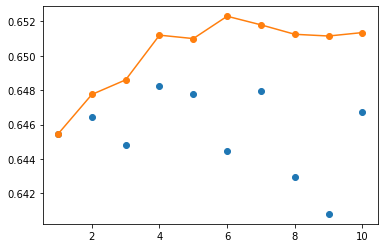

In [169]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

# multiple train-test splits
n_splits = 10
scores, members = list(), list()
for i in range(n_splits):
	# split data
	trainX, testX, trainy, testy = train_test_split(private_train_set_NN, private_train_label_NN, test_size=0.10)
	# evaluate model
	model, test_acc = evaluate_model(trainX, trainy, testX, testy)
	print('Model %.f' % i)
	print('>%.3f' % test_acc)
	scores.append(test_acc)
	members.append(model)
# summarize expected performance
print('Estimated Accuracy %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, n_splits+1):
	ensemble_score = evaluate_n_members(members, i, private_test_set_NN, private_test_label_NN)
	newy_enc = to_categorical(private_test_label_NN)
	_, single_score = members[i-1].evaluate(private_test_set_NN, newy_enc, verbose=0)
	print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
	ensemble_scores.append(ensemble_score)
	single_scores.append(single_score)
# plot score vs number of ensemble members
print('Accuracy %.3f (%.3f)' % (np.mean(single_scores), np.std(single_scores)))
x_axis = [i for i in range(1, n_splits+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

In [170]:
private_test_label_pred=ensemble_predictions(members[:10], private_test_set_NN)
# private_test_label_pred = np.argmax(private_test_label_pred_categorical, axis=-1)

# Calculate the accuracy for the bagging classifier
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(private_test_label, private_test_label_pred)
accuracy

625/625 [==============================] - 1s 2ms/step


0.65135

In [171]:
submit_label=ensemble_predictions(members[:10], test_set_NN)
download_predicted_label(submit_label, test_data, 'bagging_NN_results.csv')

938/938 [==============================] - 1s 1ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>